# Super-Market Sales

objectives are
> Understand Sales Performance
>
> Customer Insights
>
> Product Analysis
>
> Geographical Analysis
>
> Profitability Analysis
>
> Operational Efficiency
>
> Market Basket Analysis:

Notes: This data set is taken from kaggle website to do Exploratory Data Analysis Project

the city name in city column according to google its naypyidaw in myanmar

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import datetime as dt
warnings.filterwarnings("ignore")
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

# Data 

In [2]:
sales=pd.read_csv(r"C:\Users\firdo\Desktop\supermarket_sales - Sheet1.csv")

# Description of data

In [3]:
sales.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total  \
0       Health and beauty       74.69         7  26.1415  548.9715   
1  Electronic accessories       15.28         5   3.8200   80.2200   
2      Home and lifestyle       46.33         7  16.2155  340.5255   
3       Health and beauty       58.22         8  23.2880  489.0480   
4       Sports and travel       86.31         7  30.2085  634.3785   

         Date   Time      Payment    cogs  gross margin percentage  \
0  01-05-2019  13:08      Ewallet  522.83                 4.761905   
1  03-08-2019  10:29         Cash   76.40                 4.761905   
2  03-03-2019  13:23  Credit card  324.31                 4.761905   
3   1/27/2019  20:33      Ewallet  465.76                 4.761905   
4  02-08-2019  10:37      Ewallet  604.17                 4.761905   

   gross income  Rating  
0       26.1415     9.1  
1        3.8200     9.6  
2       16.2155     7.4  
3       23.2880     8.4  
4       30.2085     5.3

In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
sales.describe()

Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00     15.379369     6.97270  
std               6.131498e-14     11.708825     1.71858  
min               4.761905e+00      0.508500     4.00000  
25%               4.761905e+00      5.924875     5.50000  
50%               4.761905e+00     12.088000     7.00000  
75%               4.761905e+00     22.445250     8.50000  
max               4.761905e+00     49.650000    10.00000

# Data Cleaning

In [6]:
sales.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [7]:
sales.duplicated().sum()

0

In [8]:
sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

# Data Presentation

# Exploratory Data Analysis

# Outliers

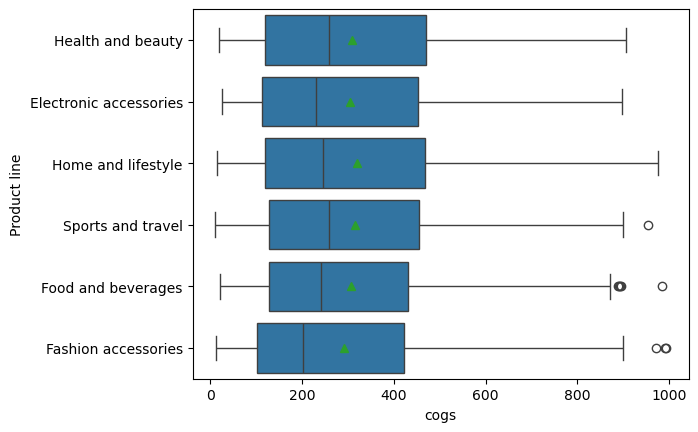

In [9]:
sns.boxplot(x='cogs',y='Product line',data=sales,showmeans=True)
plt.show()

In [10]:
feature=sales.iloc[:,:-1]
target=sales['cogs']

In [11]:
feature.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income'],
      dtype='object')

In [12]:
i = feature[(feature['Product line'] == 'Health and beauty') & (feature['cogs'] > 800)]
i

Invoice ID Branch       City Customer type Gender       Product line  \
96   766-85-7061      B   Mandalay        Normal   Male  Health and beauty   
141  280-17-4359      C  Naypyitaw        Member   Male  Health and beauty   
158  743-04-1105      B   Mandalay        Member   Male  Health and beauty   
627  628-90-8624      B   Mandalay        Member   Male  Health and beauty   
735  607-65-2441      C  Naypyitaw        Member   Male  Health and beauty   
906  450-42-3339      C  Naypyitaw        Normal   Male  Health and beauty   

     Unit price  Quantity  Tax 5%    Total        Date   Time      Payment  \
96        87.87        10  43.935  922.635   3/29/2019  10:25      Ewallet   
141       90.50        10  45.250  950.250   1/25/2019  13:48         Cash   
158       97.22         9  43.749  918.729   3/30/2019  14:43      Ewallet   
627       82.58        10  41.290  867.090   3/14/2019  14:41         Cash   
735       81.95        10  40.975  860.475  03-10-2019  12:39  Credit card   
906       84.61        10  42.305  888.405  02-09-2019  18:58  Credit card   

       cogs  gross margin percentage  gross income  
96   878.70                 4.761905        43.935  
141  905.00                 4.761905        45.250  
158  874.98                 4.761905        43.749  
627  825.80                 4.761905        41.290  
735  819.50                 4.761905        40.975  
906  846.10                 4.761905        42.305

In [13]:
i=feature[(feature['Product line']=='Fashion accessories') & (feature['cogs']>800)]
i

Invoice ID Branch       City Customer type  Gender         Product line  \
49   574-22-5561      C  Naypyitaw        Member  Female  Fashion accessories   
167  687-47-8271      A     Yangon        Normal    Male  Fashion accessories   
350  860-79-0874      C  Naypyitaw        Member  Female  Fashion accessories   
422  271-88-8734      C  Naypyitaw        Member  Female  Fashion accessories   
623  852-62-7105      B   Mandalay        Normal  Female  Fashion accessories   
941  702-83-5291      C  Naypyitaw        Member    Male  Fashion accessories   

     Unit price  Quantity  Tax 5%     Total        Date   Time      Payment  \
49        82.63        10  41.315   867.615   3/19/2019  17:08      Ewallet   
167       98.98        10  49.490  1039.290  02-08-2019  16:20  Credit card   
350       99.30        10  49.650  1042.650   2/15/2019  14:53  Credit card   
422       97.21        10  48.605  1020.705  02-08-2019  13:00  Credit card   
623       83.25        10  41.625   874.125  01-12-2019  11:25  Credit card   
941       99.82         9  44.919   943.299   3/27/2019  10:43         Cash   

       cogs  gross margin percentage  gross income  
49   826.30                 4.761905        41.315  
167  989.80                 4.761905        49.490  
350  993.00                 4.761905        49.650  
422  972.10                 4.761905        48.605  
623  832.50                 4.761905        41.625  
941  898.38                 4.761905        44.919

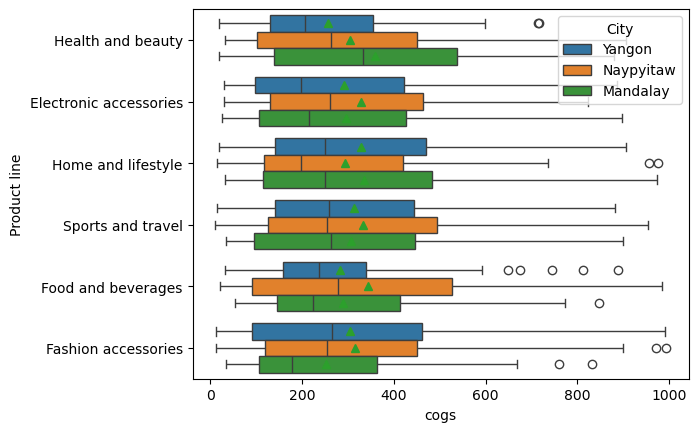

In [14]:
sns.boxplot(x='cogs',y='Product line',data=sales,hue='City',showmeans=True)
plt.show()

# Univariate Analysis

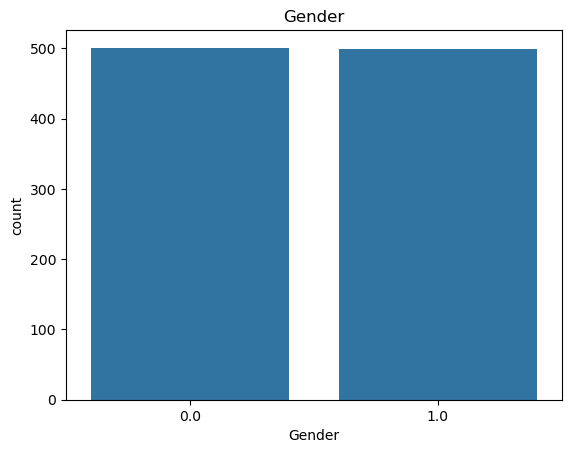

In [38]:
sns.countplot(x='Gender',data=sales)
plt.title("Gender")
plt.show()

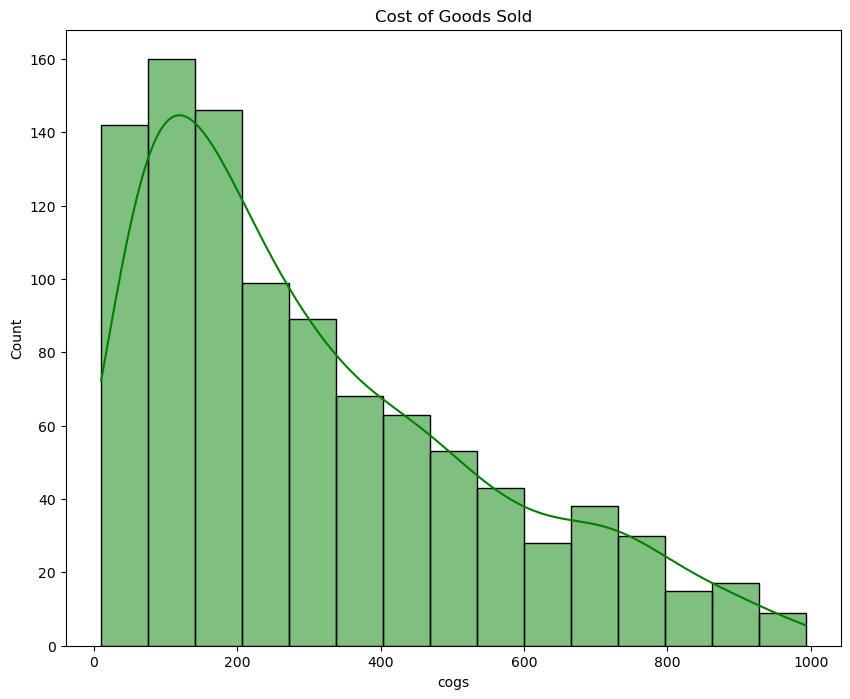

In [17]:
plt.figure(figsize=(10,8))
sns.histplot(x='cogs',kde=True,data=sales,color="green")
plt.title("Cost of Goods Sold")
plt.show()

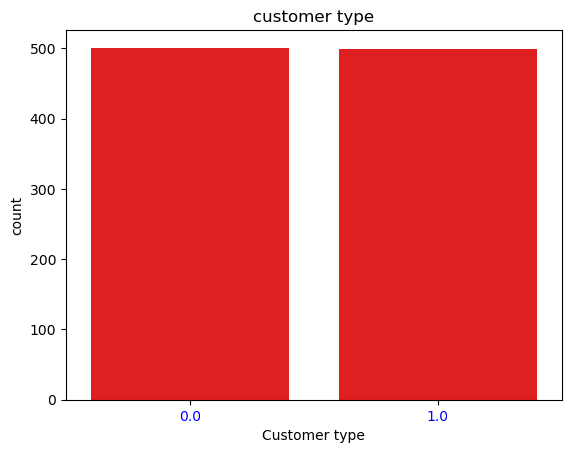

In [39]:
sns.countplot(x='Customer type',data=sales,color="r")
plt.title("customer type")
plt.xticks(color="blue")
plt.show()

In [19]:
sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

# Bivariate Analysis

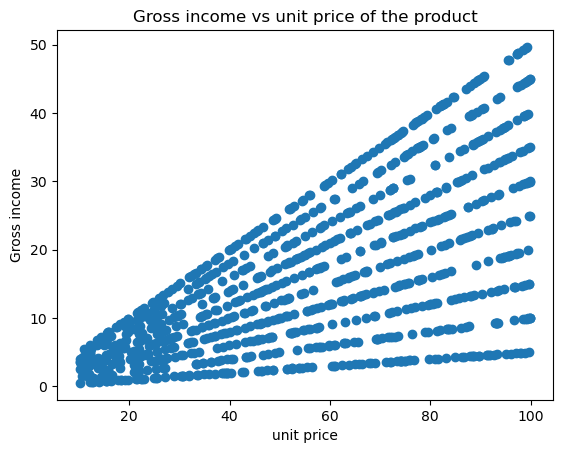

In [20]:
plt.scatter(sales['Unit price'],sales['gross income'])
plt.xticks
plt.xlabel("unit price") 
plt.ylabel("Gross income") 
plt.title('Gross income vs unit price of the product')
plt.show()

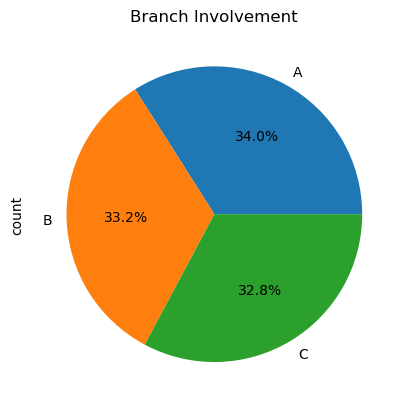

In [21]:
sales['Branch'].value_counts().plot(kind="pie",autopct='%1.1f%%')
plt.title("Branch Involvement")
plt.show()

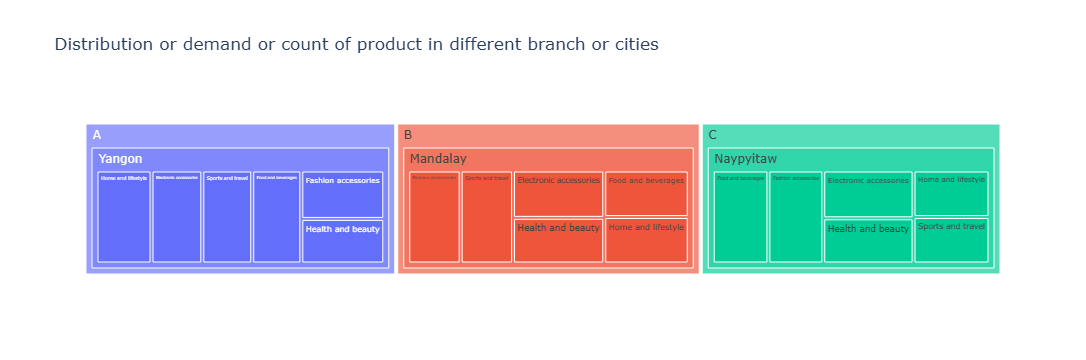

<Figure size 5000x2000 with 0 Axes>

In [22]:
plt.figure(figsize=(50,20))
px.treemap(sales,path=['Branch','City','Product line'],title="Distribution or demand or count of product in different branch or cities")


# Multivariate Analysis

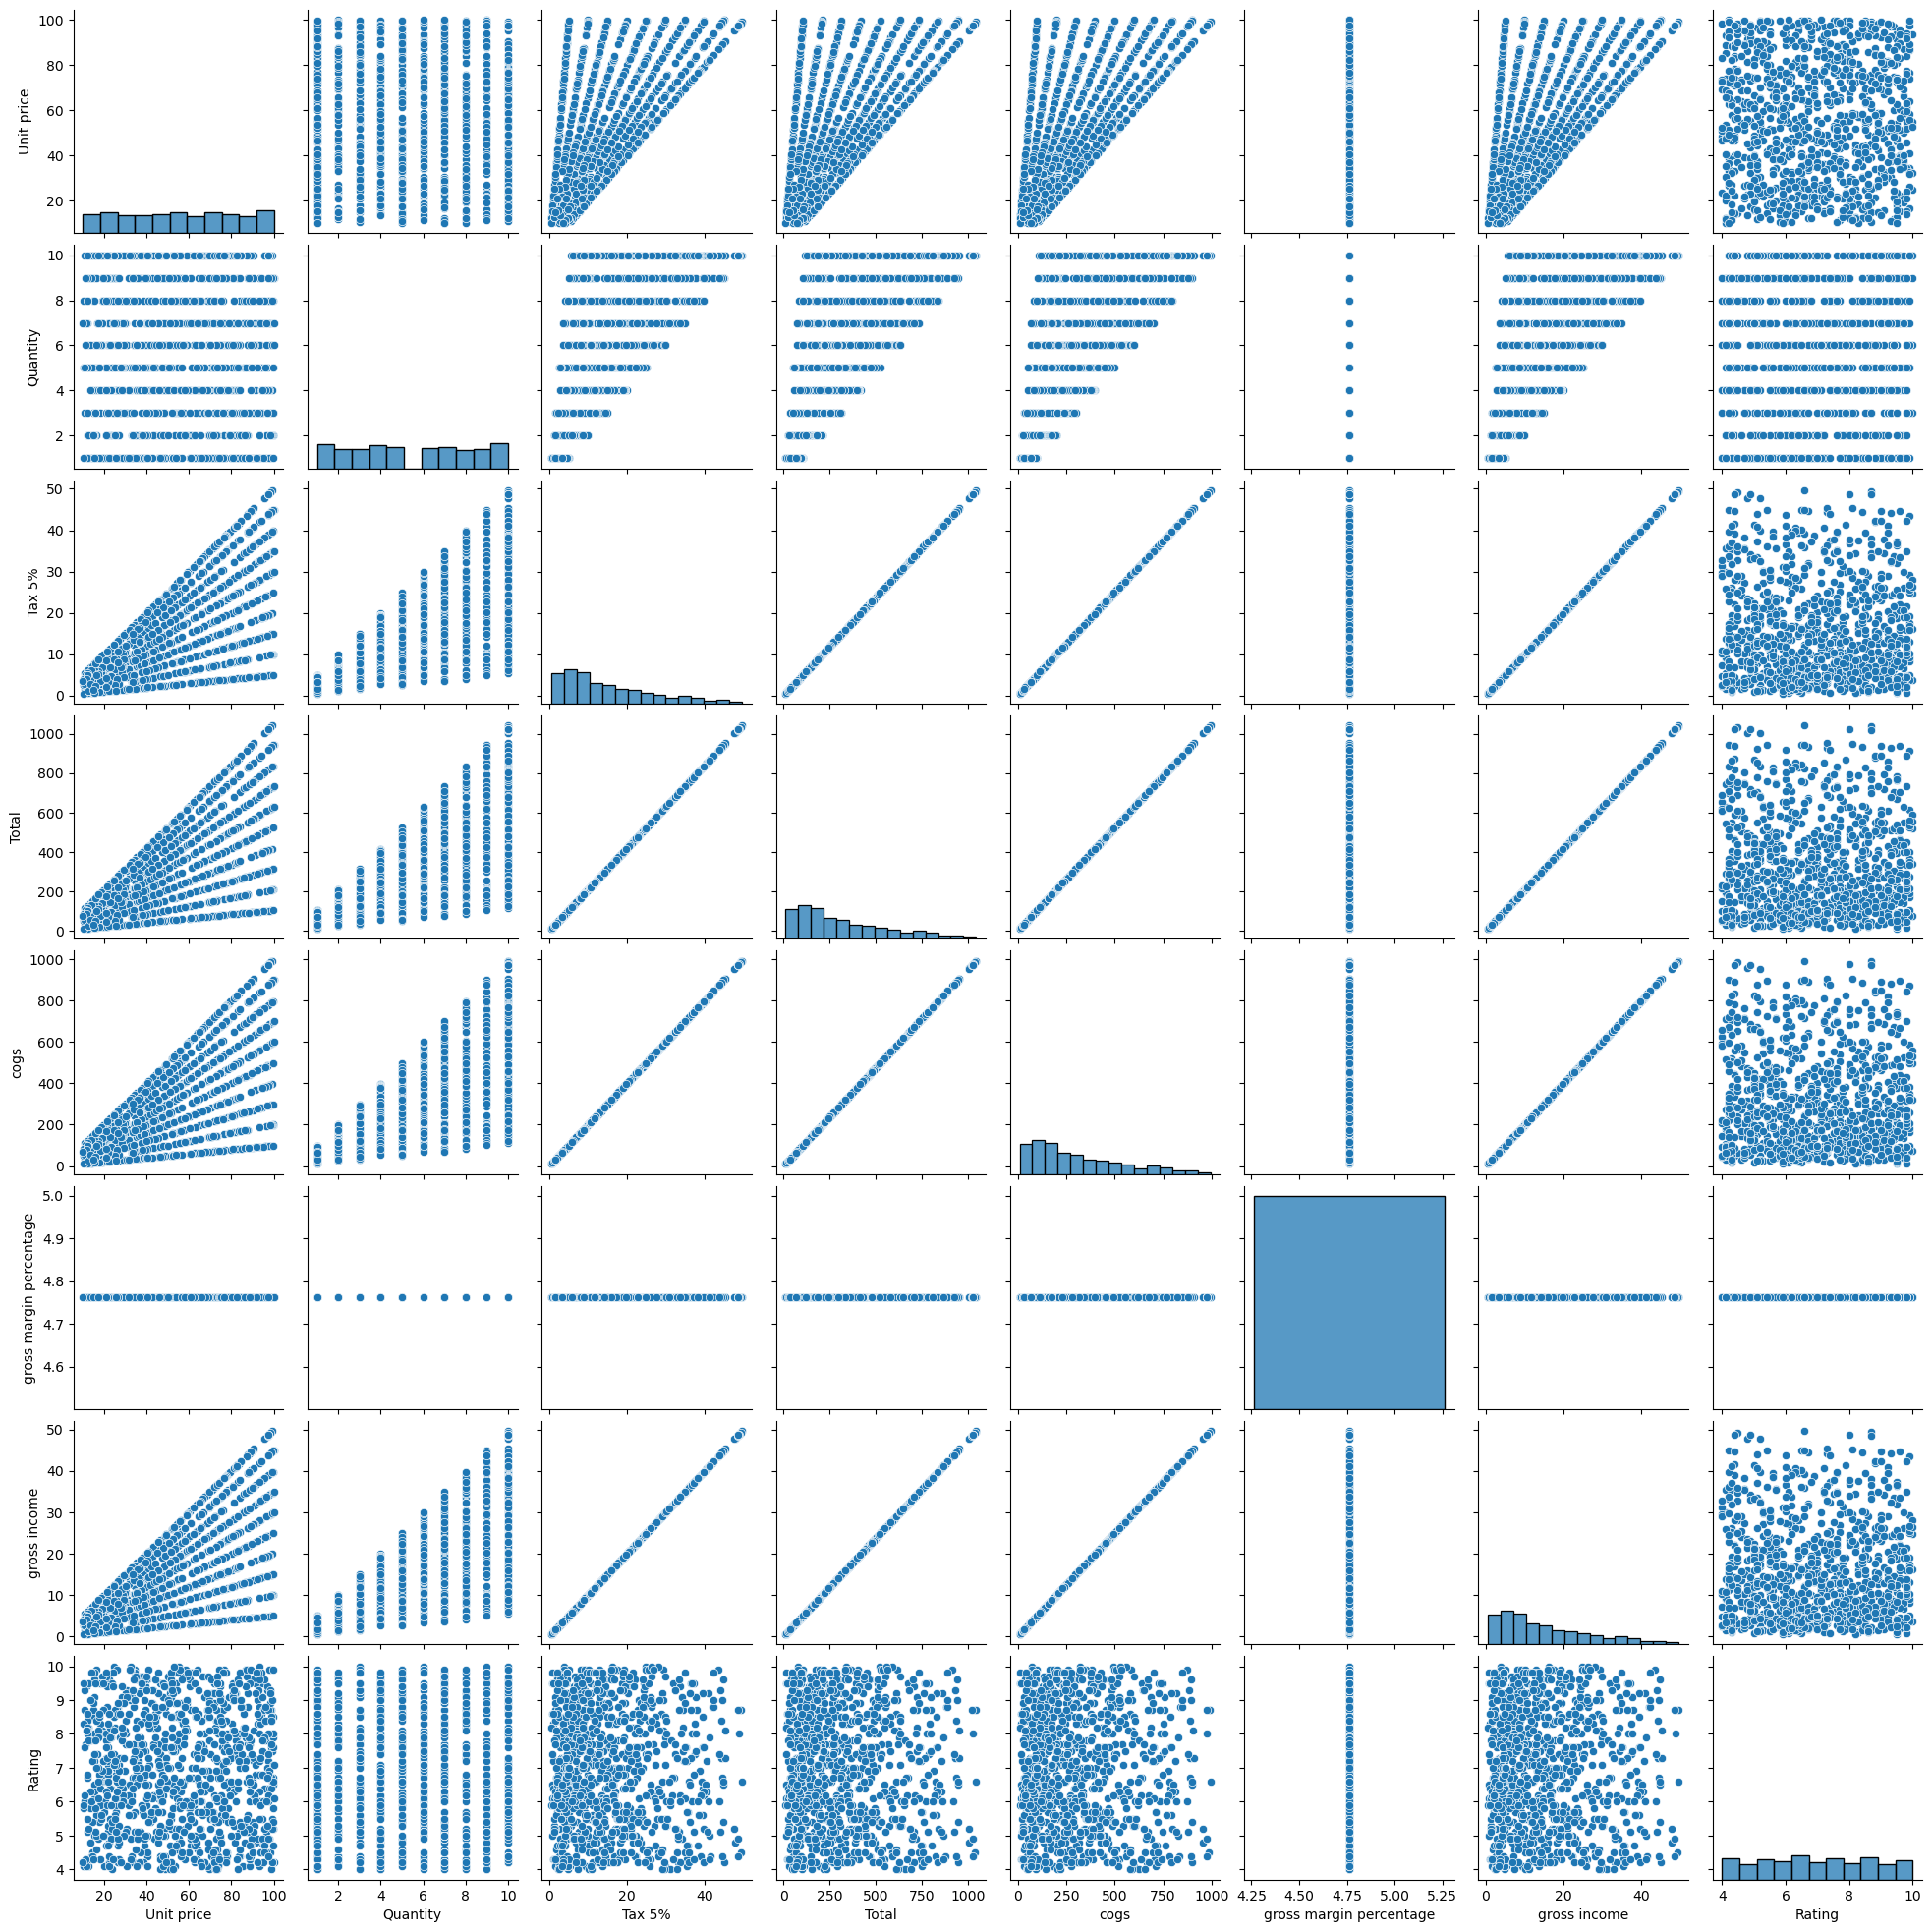

In [23]:
sns.pairplot(data=sales)
plt.show()

# Understand Sales Performance from business to customer

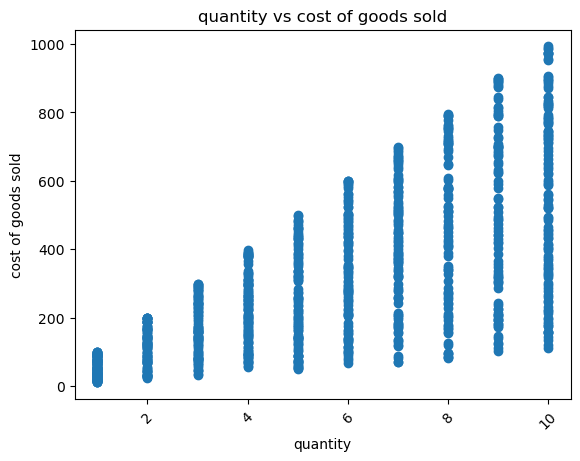

In [24]:
plt.scatter(sales['Quantity'],sales[ 'cogs'])
plt.xticks(rotation=45)
plt.title("quantity vs cost of goods sold")
plt.xlabel("quantity")
plt.ylabel("cost of goods sold")
plt.show()

From the above chart we can see that if demand is well suplied the factors of production and the cost to maintain the demand of the customer is necessary

# Geographical Analysis

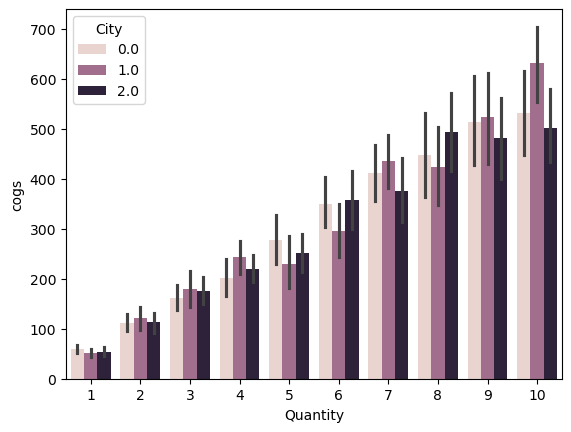

In [36]:
sns.barplot(x='Quantity',y='cogs',hue='City',data=sales)
plt.show()

From the above chart we can understand that how much a cost of goods sold differ in other cities

# Product Analysis

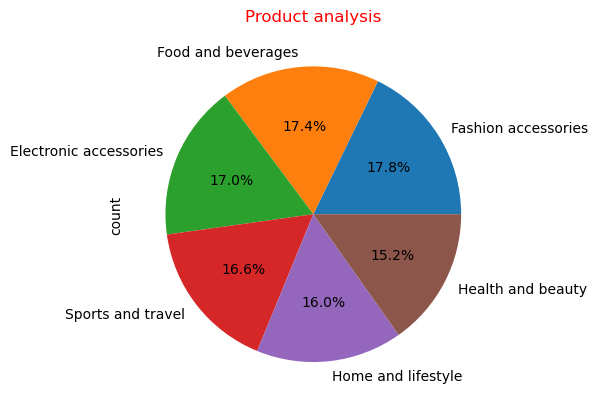

In [26]:
sales['Product line'].value_counts().plot(kind="pie",autopct='%1.1f%%')
plt.title("Product analysis",color="r")
plt.show()

# Profitability Analysis

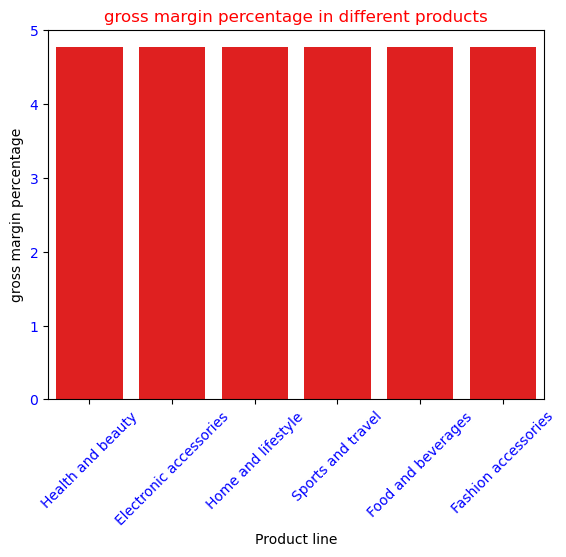

In [27]:
sns.barplot(x='Product line',y='gross margin percentage',data=sales,color="r")
plt.title('gross margin percentage in different products',color="r")
plt.xticks(rotation=45,color="b")
plt.yticks(color="blue")
plt.show()

# Market Basket Analysis

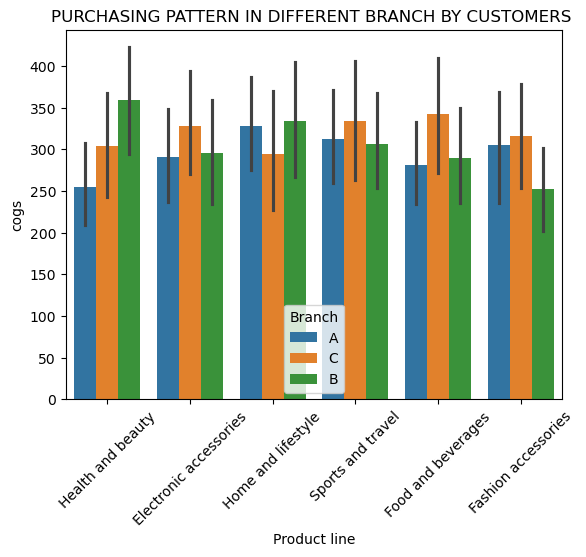

In [28]:
sns.barplot(x='Product line',y='cogs',hue='Branch',data=sales)
plt.title("PURCHASING PATTERN IN DIFFERENT BRANCH BY CUSTOMERS ")
plt.xticks(rotation=45)
plt.show()


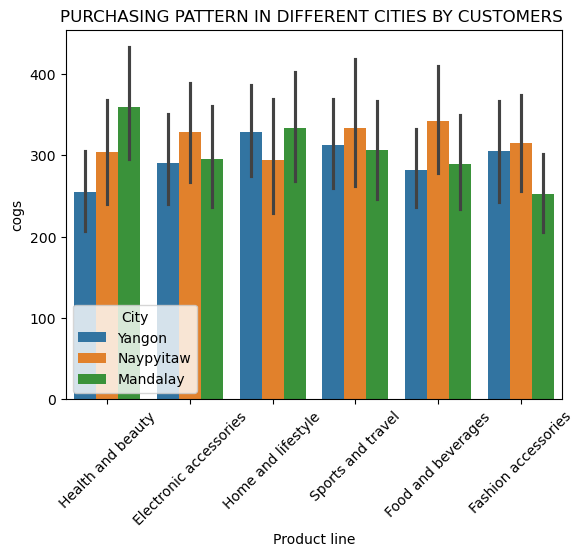

In [29]:
sns.barplot(x='Product line',y='cogs',hue='City',data=sales)
plt.title("PURCHASING PATTERN IN DIFFERENT CITIES BY CUSTOMERS ")
plt.xticks(rotation=45)
plt.show()

# Scaling

In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [31]:
category_columns=sales.select_dtypes(object).columns

In [32]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

In [33]:
sales[category_columns]=oe.fit_transform(sales[category_columns])

In [34]:
sales.describe()

Invoice ID       Branch         City  Customer type       Gender  \
count  1000.000000  1000.000000  1000.000000    1000.000000  1000.000000   
mean    499.500000     0.988000     1.008000       0.499000     0.499000   
std     288.819436     0.817633     0.820127       0.500249     0.500249   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     249.750000     0.000000     0.000000       0.000000     0.000000   
50%     499.500000     1.000000     1.000000       0.000000     0.000000   
75%     749.250000     2.000000     2.000000       1.000000     1.000000   
max     999.000000     2.000000     2.000000       1.000000     1.000000   

       Product line   Unit price     Quantity       Tax 5%        Total  \
count   1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean       2.452000    55.672130     5.510000    15.379369   322.966749   
std        1.715412    26.494628     2.923431    11.708825   245.885335   
min        0.000000    10.080000     1.000000     0.508500    10.678500   
25%        1.000000    32.875000     3.000000     5.924875   124.422375   
50%        2.000000    55.230000     5.000000    12.088000   253.848000   
75%        4.000000    77.935000     8.000000    22.445250   471.350250   
max        5.000000    99.960000    10.000000    49.650000  1042.650000   

              Date         Time      Payment        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.00000   
mean     43.499000   251.176000     1.001000   307.58738   
std      24.936235   147.066923     0.830475   234.17651   
min       0.000000     0.000000     0.000000    10.17000   
25%      22.000000   127.000000     0.000000   118.49750   
50%      43.000000   248.000000     1.000000   241.76000   
75%      65.000000   383.000000     2.000000   448.90500   
max      88.000000   505.000000     2.000000   993.00000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00     15.379369     6.97270  
std               6.131498e-14     11.708825     1.71858  
min               4.761905e+00      0.508500     4.00000  
25%               4.761905e+00      5.924875     5.50000  
50%               4.761905e+00     12.088000     7.00000  
75%               4.761905e+00     22.445250     8.50000  
max               4.761905e+00     49.650000    10.00000

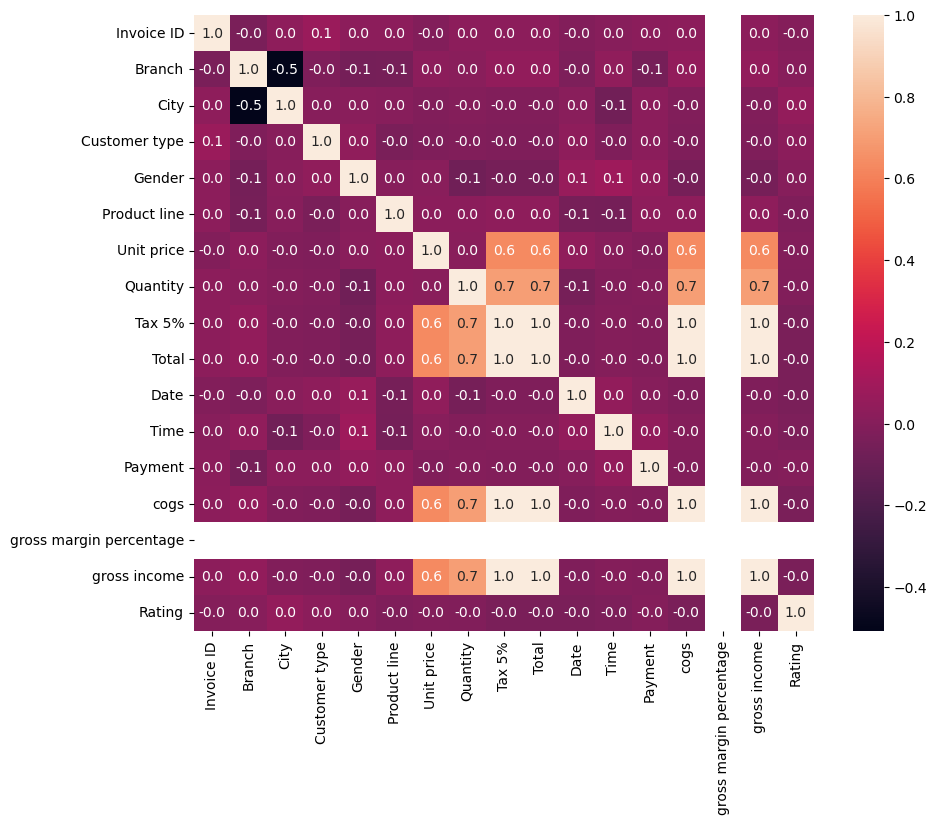

In [35]:
a=sales.corr()
plt.figure(figsize=(10,8))
sns.heatmap(a,annot=True,fmt="0.1f")
plt.show()

# Insights and Recommendations

# 1- outliers

> the outliers are detected in product line to cost of goods sold (sports and travel
>
> , food and beverages,
>
> fashion accessories )

# 2-Univariate Analysis

> the count of customer according to gender are equal
>
> the cost of goods sold have left skewness
>
> the customer type that is member and normal are same
>
> 

# Bivariate Analysis


> the gross income have effect on unit price of the product more the price of one unit but no change in gross income
>
> the branch "A" have 34.0% involvement, branch "B" have 33.2% involvement and branch "C" have 32.8% involvement in the whole business of 100%  
> 

# Understand Sales Performance from business to customere

> when the quantity is more the cost of goods sold is also high or increasing as the quantity increases
>

# Geographical Analysis

> the number of purchases of goods:
>
> in health and beauty sector the purchases in mandalay city is high or more than others
>
> in Electronic accessories  sector the purchases in naypyidaw city is high or more than others
>
> in Home and lifestyle sector the purchases in mandalay city is high or more than others
>
> in sports and travel naypyidaw sector the purchases in mandalay city is high or more than others
>
> in food and beverages sector the purchases in naypyidaw city is high or more than others
>
> in fashion accessories sector the purchases in naypyidaw city is high or more than others

# Product analysis

> refer to pie chart

# Profitability Analysis

> the gross margin percentage is same in all products

# Recommendation

> the customer type that is member and normal are same so that should be different as normal customer and member that which have taken membership should be more as compared to normal customer some important steps or research should be done 
>
> the gross margin percentage is same in all products according to the price the gross margin percentage should differ